**Importing dependencies :**

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer

**Loading dataset :**

In [9]:
dataset = pd.read_csv("../datasets/housing/housing.csv")
list(dataset)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

**Adding Income category :**

<Axes: >

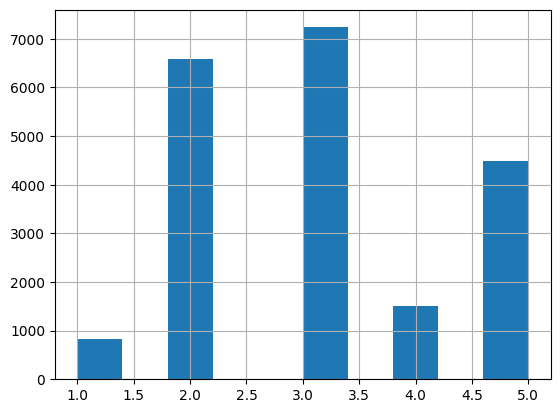

In [11]:
dataset["income_cat"] = pd.cut(dataset["median_income"],bins=[0.,1.5,3.0,4.5,5.,np.inf],labels=[1,2,3,4,5]) 
dataset["income_cat"].hist()

**Stratified Sampling :**

In [12]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

In [14]:
for train_index, test_index in split.split(dataset,dataset["income_cat"]):
    strat_train_set = dataset.loc[train_index]
    strat_test_set = dataset.loc[test_index]

In [15]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

income_cat
3    0.350533
2    0.318798
5    0.217539
4    0.073159
1    0.039971
Name: count, dtype: float64

**Removing newly created category class :**

In [18]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

**Visualising the data :**

In [19]:
housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

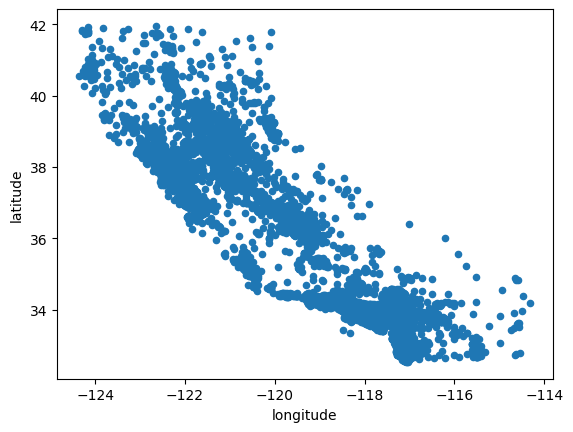

In [20]:
housing.plot(kind="scatter",x="longitude",y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

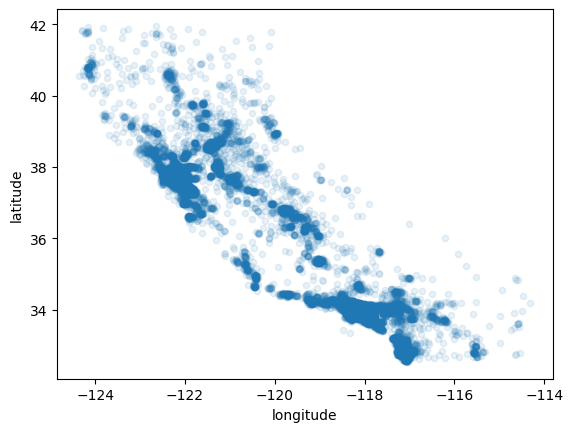

In [21]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)

<Axes: xlabel='longitude', ylabel='latitude'>

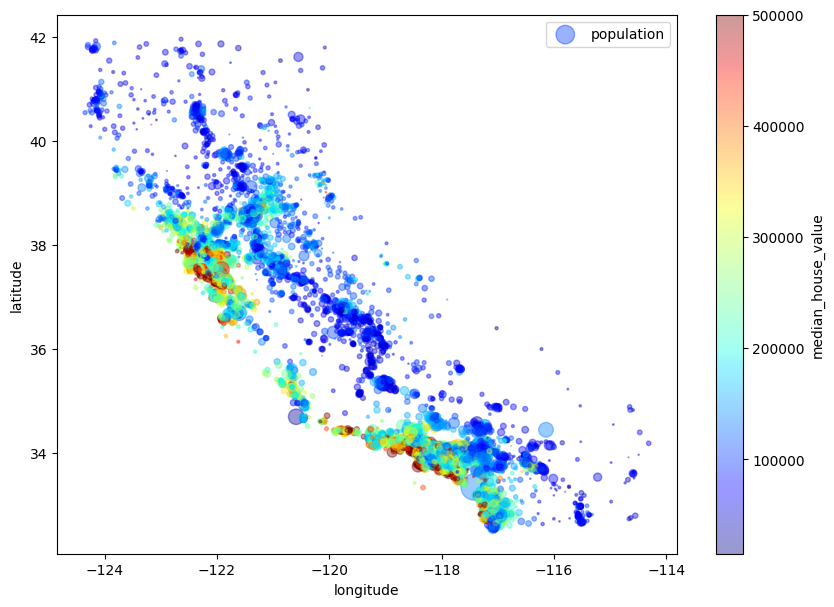

In [23]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,s=housing["population"]/100,label="population",figsize=(10,7),c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True)

**Corelation :**

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

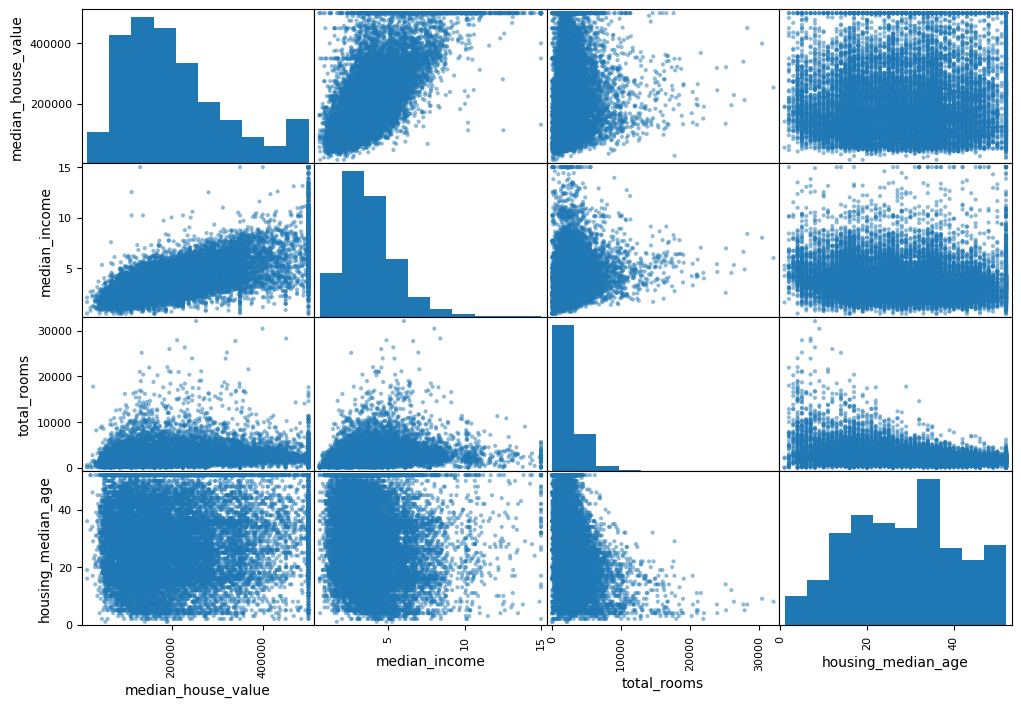

In [25]:
attributes = ["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes],figsize=(12,8))

**Preparing data for ML :**

In [29]:
housing = strat_train_set.drop("median_house_value",axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

**Data Cleaning :**

In [30]:
impute = SimpleImputer(strategy="median")

In [31]:
housing_num = housing.drop("ocean_proximity",axis=1)
impute.fit(housing_num)

SimpleImputer(strategy='median')

In [35]:
impute.statistics_

array([-118.52   ,   34.26   ,   29.     , 2119.     ,  432.     ,
       1163.     ,  407.     ,    3.54155])

In [37]:
x = impute.transform(housing_num)
housing_tr = pd.DataFrame(x,columns=housing_num.columns,index=housing_num.index)

In [38]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
20075,-120.28,38.07,13.0,1996.0,410.0,618.0,218.0,2.9083
17216,-119.71,34.43,48.0,2408.0,536.0,1005.0,497.0,3.5213
5618,-118.23,33.78,20.0,59.0,24.0,69.0,23.0,2.5588
12413,-116.22,33.74,26.0,4120.0,858.0,2918.0,815.0,3.3107
2025,-119.74,36.71,17.0,5872.0,1250.0,5034.0,1224.0,2.1905
...,...,...,...,...,...,...,...,...
3327,-122.83,38.89,11.0,640.0,134.0,268.0,90.0,3.4514
20131,-118.92,34.41,22.0,2702.0,655.0,2664.0,571.0,3.0893
18341,-122.14,37.43,52.0,1327.0,190.0,467.0,189.0,12.5902
9661,-120.87,41.54,21.0,1091.0,208.0,660.0,188.0,2.2321
